<a href="https://colab.research.google.com/github/apchavezr/19.-Procesamiento-del-Lenguaje-Natural/blob/main/SVM_Sentimientos_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ejemplo 2. Análisis de sentimientos con SVM (español)

**Objetivo:** clasificar reseñas de películas como **positivas** o **negativas** usando **TF-IDF** y **SVM** (LinearSVC).  
Se entrenará un modelo, se evaluará con métricas estándar y se visualizará la matriz de confusión.  
Incluye ejercicios para experimentar con n-gramas y *C* (regularización).



## contenidos y resultados de aprendizaje
1. crear un mini dataset sintético (reseñas positivas/negativas).
2. dividir en *train/test* estratificado.
3. construir un *pipeline* `TfidfVectorizer` + `LinearSVC`.
4. entrenar, evaluar y analizar métricas: **accuracy**, **precision**, **recall**, **F1**.
5. visualizar la **matriz de confusión**.
6. realizar predicciones sobre nuevas reseñas.
7. ejercicios guiados (n-gramas, regularización, limpieza, ampliación del dataset).


In [1]:

# En Colab: descomente si requiere instalar
# !pip install scikit-learn pandas matplotlib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



## 1. crear el dataset sintético


In [2]:

positivas = [
    "excelente película, la actuación fue memorable",
    "una historia impactante y bien contada",
    "me encantó el guion y la dirección, totalmente recomendable",
    "buen ritmo, personajes profundos y final conmovedor",
    "fotografía hermosa y música cautivadora",
    "una obra destacada, superó mis expectativas",
    "gran actuación del reparto, muy convincente",
    "emocionante de principio a fin, la volvería a ver",
    "diálogos inteligentes y una trama sólida",
    "experiencia cinematográfica gratificante y entretenida"
]

negativas = [
    "aburrida y predecible, me dormí a la mitad",
    "la actuación fue pobre y el guion confuso",
    "sin emoción, lenta y con un final decepcionante",
    "efectos mediocres y personajes poco creíbles",
    "dirección floja, no la recomendaría",
    "trama incoherente y desenlace forzado",
    "demasiado larga y sin interés real",
    "diálogos vacíos y escenas innecesarias",
    "falló en generar tensión, totalmente olvidable",
    "prometía mucho pero resultó decepcionante y torpe"
]

df = pd.DataFrame({
    "texto": positivas + negativas,
    "etiqueta": ["positiva"] * len(positivas) + ["negativa"] * len(negativas)
})

df.sample(6, random_state=0)


,texto,etiqueta
18,"falló en generar tensión, totalmente olvidable",negativa
1,una historia impactante y bien contada,positiva
19,prometía mucho pero resultó decepcionante y torpe,negativa
8,diálogos inteligentes y una trama sólida,positiva
10,"aburrida y predecible, me dormí a la mitad",negativa
17,diálogos vacíos y escenas innecesarias,negativa



## 2. partición entrenamiento/prueba (estratificada)


In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    df["texto"],
    df["etiqueta"],
    test_size=0.3,
    random_state=42,
    stratify=df["etiqueta"]
)
len(X_train), len(X_test), y_train.value_counts(), y_test.value_counts()


(14,
 6,
 etiqueta
 positiva    7
 negativa    7
 Name: count, dtype: int64,
 etiqueta
 negativa    3
 positiva    3
 Name: count, dtype: int64)


## 3. pipeline TF-IDF + LinearSVC


In [4]:

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2))),
    ("clf", LinearSVC(C=1.0, max_iter=5000, dual=True))
])



## 4. entrenamiento y evaluación


In [5]:

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

acc = accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds, labels=["positiva","negativa"])
print("Accuracy:", round(acc, 3))
print("\nMatriz de confusión (filas=verdad, columnas=predicción):")
print(pd.DataFrame(cm, index=["positiva","negativa"], columns=["positiva","negativa"]))

print("\nReporte de clasificación:")
print(classification_report(y_test, preds, target_names=["positiva","negativa"]))


Accuracy: 0.5

Matriz de confusión (filas=verdad, columnas=predicción):
          positiva  negativa
positiva         1         2
negativa         1         2

Reporte de clasificación:
              precision    recall  f1-score   support

    positiva       0.50      0.67      0.57         3
    negativa       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6




## 5. visualización de la matriz de confusión


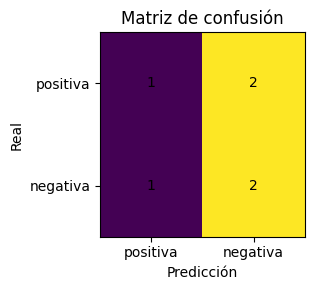

In [6]:

fig = plt.figure(figsize=(4,3))
plt.imshow(cm, interpolation='nearest')
plt.title("Matriz de confusión")
plt.xticks([0,1], ["positiva","negativa"])
plt.yticks([0,1], ["positiva","negativa"])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()



## 6. predicciones sobre nuevas reseñas


In [7]:

nuevas_reseñas = [
    "la película fue lenta y sin emoción",
    "actuaciones brillantes y una historia poderosa",
    "fotografía impecable aunque el guion es flojo",
    "un final conmovedor y una música increíble",
    "demasiado predecible y sin sorpresas"
]
for r in nuevas_reseñas:
    print(f"- {r} -> {pipe.predict([r])[0]}")


- la película fue lenta y sin emoción -> negativa
- actuaciones brillantes y una historia poderosa -> positiva
- fotografía impecable aunque el guion es flojo -> negativa
- un final conmovedor y una música increíble -> positiva
- demasiado predecible y sin sorpresas -> negativa



## 7. ejercicios guiados
1. n-gramas: cambie `ngram_range=(1,2)` a `(1,1)` y `(1,3)`. Compare métricas.
2. regularización C: pruebe `C=0.5`, `C=2.0` y `C=5.0`.
3. limpieza: normalice tildes, minúsculas o signos. ¿Afecta la precisión?
4. ampliación: agregue 10 reseñas por clase con vocabulario variado. Vuelva a evaluar.
5. errores: identifique textos mal clasificados y analice términos influyentes.
